# Punto 1 - Tarea 2 - Miguel Rios Tangarife

Traemos las librerías que vamos a usar

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
import glob
import matplotlib.image as img
from PIL import Image
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
#Descarga de las imagenes
def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

Indicamos donde estan las imagenes

In [4]:
#En X ponemos las imagenes
d_name = 'C:\\GitHub\\Estadistica3_2023-2\\Tarea2\\data\\faces\\rawdata'
X = []

for nfile in os.listdir(d_name):
    bytes_read = open(os.path.join(d_name, nfile), "rb").read()
    img_data = Image.frombytes('L', (128, 128), bytes_read)
    X.append(np.array(img_data).flatten())

X = np.array(X)

In [5]:
#Trabajamos con 3993 imagenes y cada una tiene 16384 pixeles
X.shape

(3993, 16384)

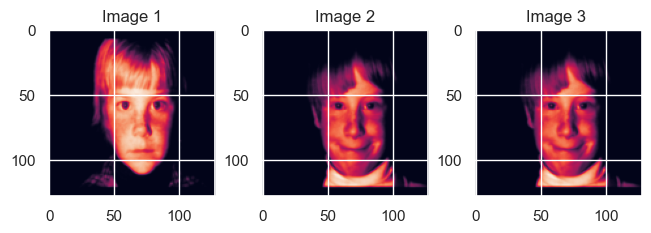

In [6]:
#Funciones para visualizar imagenes en formato especifico
#Nos ayudarán para generar los gráficos correspondientes.
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
plot_3_images(X,1, 2 , 3)

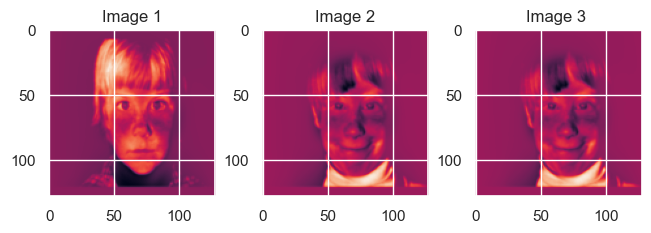

In [7]:
#Centramos los datos
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_3_images(X_center,1, 2 ,3)

## Mean face 

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

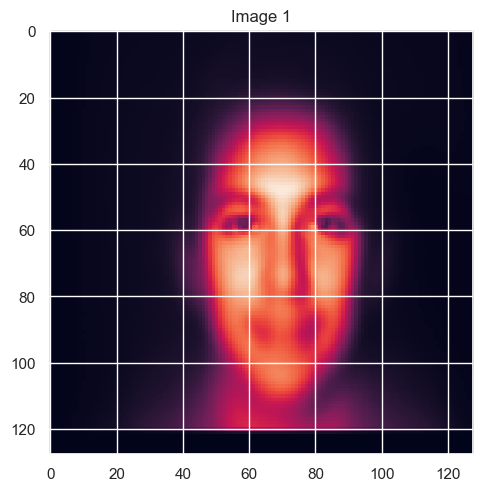

In [8]:
#Visualizamos la mean face
plot_1_images(X_mean)

## Empleamos PCA

In [9]:
#Aplicamos PCA con 200 componentes inicialmente
pca = PCA(n_components=200)
# images x dim
X_reduced = pca.fit_transform(X_center)

In [10]:
#Calculamos los eigen values
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

In [11]:
eigen_values

array([7.32420891e+06, 2.15718453e+06, 1.85813876e+06, 9.75416680e+05,
       8.90129813e+05, 7.89191985e+05, 6.21898507e+05, 4.19131866e+05,
       3.61422714e+05, 2.95051423e+05, 2.28587494e+05, 2.27095623e+05,
       1.94624139e+05, 1.86033651e+05, 1.70286094e+05, 1.57874095e+05,
       1.52472522e+05, 1.44768233e+05, 1.24995062e+05, 1.20067645e+05,
       1.17078293e+05, 1.11845380e+05, 1.04416679e+05, 1.01282734e+05,
       9.52964519e+04, 9.04634310e+04, 8.50867123e+04, 8.11756110e+04,
       7.71613532e+04, 7.37759042e+04, 6.95922083e+04, 6.71508889e+04,
       6.49471813e+04, 6.21272654e+04, 5.94283658e+04, 5.78440982e+04,
       5.48819168e+04, 5.44402291e+04, 5.20407659e+04, 4.99376255e+04,
       4.89796271e+04, 4.74574843e+04, 4.58922426e+04, 4.41544500e+04,
       4.29717864e+04, 4.14701614e+04, 4.09152576e+04, 4.03283111e+04,
       3.73473951e+04, 3.69807547e+04, 3.56148326e+04, 3.44818749e+04,
       3.36401596e+04, 3.33421668e+04, 3.21277065e+04, 3.05690224e+04,
      

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

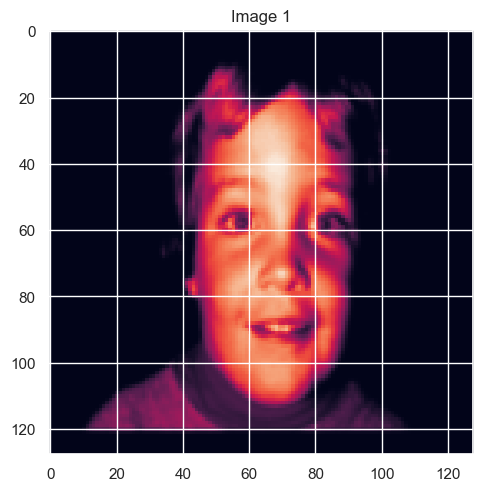

In [12]:
#Visualizamos la primer imagen
plot_1_images(X[0])

## Reconstruir imagen - primer imagen

In [13]:
print('Componentes', X_reduced.shape)
print('Eigenvectores', eigen_faces.shape)
face_1 = np.dot(X_reduced[0].reshape(1,-1),eigen_faces)
print(face_1.sum(axis=0))

Componentes (3993, 200)
Eigenvectores (200, 16384)
[-2.06171580e-11 -9.39902498e-12 -4.91232590e-02 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [14]:
eigen_faces[0].shape
face_c1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
face_c1.shape

(1, 16384)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

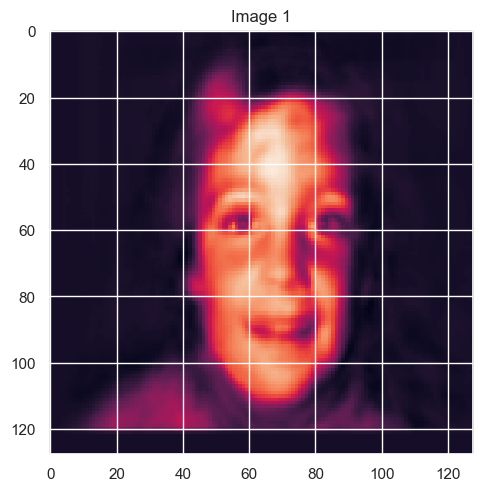

In [15]:
plot_1_images(X_mean + face_1.sum(axis=0) )

## Componentes 1, 5, 10


(None, <Axes: title={'center': 'Con 200 eigenfaces'}>)

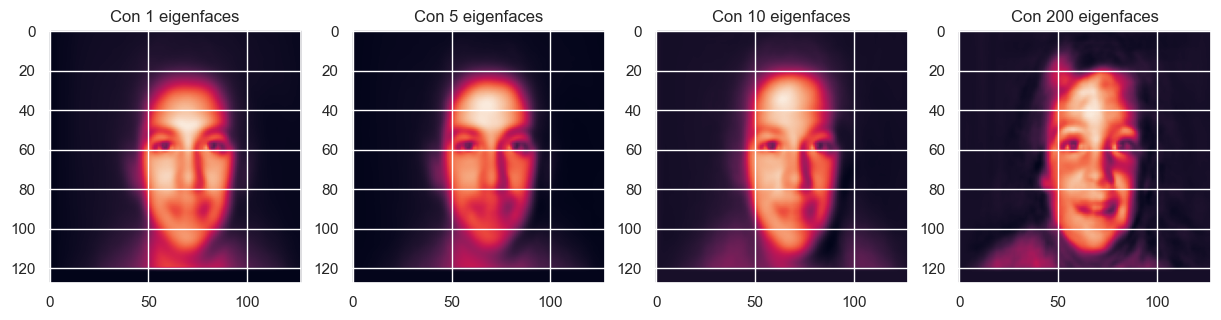

In [16]:
face_1 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:200],
                                     eigen_faces[:200,:]),
                              axis=0)
fig, ax = plt.subplots(1,4,figsize=(15,15))

#Visualizamos las imagenes
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_200,ax=ax[3],label="Con 200 eigenfaces")

## Componentes que explican 90% y 99% de la varianza

In [17]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

In [19]:
n_components_90 = np.where(explained_variance_ratio_cumulative >= 0.90)[0][0] + 1
n_components_95 = np.where(explained_variance_ratio_cumulative >= 0.95)[0][0] + 1

if len(np.where(explained_variance_ratio_cumulative >= 0.99)[0]) > 0:
    n_components_99 = np.where(explained_variance_ratio_cumulative >= 0.99)[0][0] + 1
else:
    n_components_99 = None

In [75]:
#como no encontré valores para 99%, buscaré si con valores inferiores puede existir
#Y encontré con 95%

In [20]:
print("componentes que explican el 90%: ",n_components_90)
print("componentes que explican el 95%: ",n_components_95)
print("componentes que explican el 99%: ",n_components_99)
print("No se encontrarón valores que satisfacen el 99%")

componentes que explican el 90%:  75
componentes que explican el 95%:  177
componentes que explican el 99%:  None
No se encontrarón valores que satisfacen el 99%


## Componentes 75(90%) y 177(95%)

(None, <Axes: title={'center': 'Con 600 eigenfaces'}>)

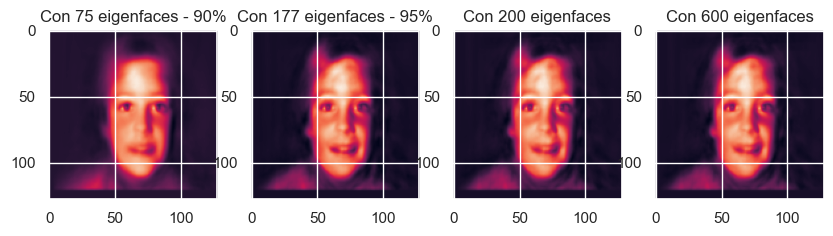

In [21]:
face_75 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:75],
                                 eigen_faces[:75,:]),
                            axis=0)
face_177 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:177],
                                      eigen_faces[:177,:]),
                               axis=0)
face_600 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:600],
                                      eigen_faces[:600,:]),
                               axis=0)

fig, ax = plt.subplots(1,4,figsize=(10,10))

plot_1_images(face_75,ax=ax[0],label="Con 75 eigenfaces - 90%")
plot_1_images(face_177,ax=ax[1],label="Con 177 eigenfaces - 95%")
plot_1_images(face_200,ax=ax[2],label="Con 200 eigenfaces")
plot_1_images(face_600,ax=ax[3],label="Con 600 eigenfaces")

## Observaciones

A medida que utilizamos más eigenfaces, la imagen mejora su apariencia, pero después de 177 eigenfaces, los cambios son apenas perceptibles.

Este proceso lo podemos realizar para las demás imágenes.

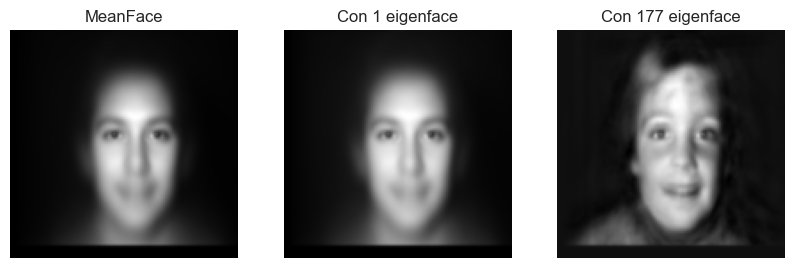

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_1_images(image, ax, label):
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

face_1 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:1],
                                      eigen_faces[:1,:]),
                               axis=0)
face_177 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:200],
                                      eigen_faces[:200,:]),
                               axis=0)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

plot_1_images(X_mean.reshape(128, 128), ax=ax[0], label="MeanFace")

plot_1_images(face_1.reshape(128, 128), ax=ax[1], label="Con 1 eigenface")

plot_1_images(face_177.reshape(128, 128), ax=ax[2], label="Con 177 eigenface")

plt.show()

Con 1 eigenface, es similar a MeanFace; con 177, se asemeja más a la imagen original.

## Gráfica para determinar cuántas eigenfaces (o componentes principales) son necesarias

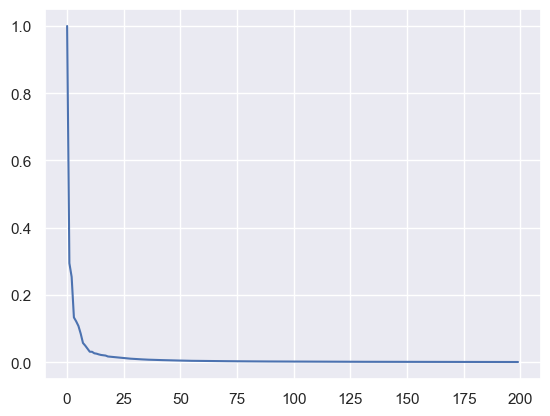

In [23]:
#Esta gráfica ayuda a identificar cuántas eigenfaces
#o componentes principales son necesarios para una representación 
#efectiva de los datos en un análisis de PCA.
plt.plot(range(0,200), eigen_values/eigen_values[0])

En la gráfica, observamos que la mayoría de la información se encuentra en los valores iniciales, y a partir de alrededor del valor 100, los cambios son apenas perceptibles.